<a href="https://colab.research.google.com/github/Highashikata/Data-Science---Bad-or-Good-Customer-to-give-a-Loan-to-/blob/main/Data_Science_Good_or_Bad_Customer_to_give_a_loan_to.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project : Prediction if a Customer is Good or Bad to give a loan to**.

Based on same basic bank raw data, we will be analyzing the dataset by going through all the crucial steps of a Data Science Project, from preparing the Data to Building the Machine Learning Model, in order to validate it to have it as a reference for a bank or any financial institution that preoccupy to give loans to its customers.

And in this project we will try to build ultimately a Logistic Regression Model and understand the hyper parameters that can allow us to optimize our choices for a an optimal model.

### **Importing & Installing Packages**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


%matplotlib inline

# Increase the size of seaborn plots
sns.set(rc = {'figure.figsize': (8, 8)})

# !conda list check the packages installed

#### **Step 1 : Getting the Data**

In [3]:
# Loading the data to google colab
from google.colab import files
uploaded = files.upload()

Saving Raw_Data.csv to Raw_Data.csv


In [4]:
raw_data = pd.read_csv("Raw_Data.csv")

# Displaying the First Rows of the Data
display(raw_data.head(10), "The Shape of the DataSet is {}".format(raw_data.shape))

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No
5,No Data,critical,Learning / Edu purposes,6130.0,0-200,2-5 Years,Male,No,No Security,30.0,Free,Skilled Labor,No,No
6,No Data,critical,Buying a New Car,1394.0,0-200,0-2 Years,Female,No,Vehicle,37.0,House Owner,Professional / Management,No,No
7,No Data,critical,Buying a New Car,7242.0,0-200,2-5 Years,Male,No,Savings Account,41.0,House Owner,Services,No,No
8,No Data,critical,TV,9581.0,0-200,2-5 Years,Female,No,Vehicle,31.0,House Owner,Skilled Labor,No,No
9,No Data,critical,TV,734.0,No Data,7+ Years,Male,No,Savings Account,44.0,Renting,Services,No,No


'The Shape of the DataSet is (1006, 14)'

In [5]:
# Copying the Data in order to proceed to benchmarking when we finish analyzing the Data 
df = raw_data.copy()

#### **Step 2 : Data Preprocessing**

In [6]:
# Exploring the Data
display("The Features of the DataSet are ", df.columns)

'The Features of the DataSet are '

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

In [7]:
# Exploring the DataTypes of our Features
df.dtypes

Type of Account           object
Account History           object
Reason for the Loan       object
Loan Amount              float64
Account Savings           object
Employment History        object
Individual Stauts         object
Other Loans               object
Security / Collateral     object
Age                      float64
Residence Status          object
Job                       object
Completed Other loan?     object
Good Loan                 object
dtype: object

So apparently, we have only two features with purely numeric data the *Loan Amount* & *Age* columns. And for the rest of the Data, the type that we have is the *Object*. 
At all events, we will convert our data to dummy one in order to build the Model.

In [8]:
# Displaying the Unique Values of each columns
for column in df:
  if len(df[column].unique()) < 10:
    print('The Number of Values for the Feature {} : {} ---- {}'.format(column, df[column].unique(), len(df[column].unique())))
  else:
    print('The Number of values for the Feature {} : {}'.format(column, len(df[column].unique())))


The Number of Values for the Feature Type of Account : ['No Data' 'Type A' 'Type B' 'Type C' nan] ---- 5
The Number of Values for the Feature Account History : ['critical' 'Average (known delays)' 'Good' nan] ---- 4
The Number of values for the Feature Reason for the Loan : 11
The Number of values for the Feature Loan Amount : 914
The Number of Values for the Feature Account Savings : ['0-200' 'No Data' '200-500' '1000+' '500-1000' nan '0-201'] ---- 7
The Number of Values for the Feature Employment History : ['5-7 Years' '7+ Years' '2-5 Years' '0-2 Years' 'Unemployed' nan] ---- 6
The Number of Values for the Feature Individual Stauts : ['Male' 'Married' 'Female' 'Divorced' 'Female_' nan] ---- 6
The Number of Values for the Feature Other Loans : ['No' 'Yes' nan] ---- 3
The Number of Values for the Feature Security / Collateral : ['Property - Real Estate' 'Savings Account' 'Vehicle' 'No Security' nan] ---- 5
The Number of values for the Feature Age : 58
The Number of Values for the Featu

In [9]:
# Describing the Data 
df.describe()

,Loan Amount,Age
count,1.003000e+03,1002.000000
mean,-5.436215e+05,35.841317
std,1.732054e+07,14.657180
min,-5.485413e+08,18.000000
25%,1.374500e+03,27.000000
50%,2.326000e+03,33.000000
75%,3.981500e+03,42.000000
max,1.842700e+04,327.000000


After descring the Data, we observe some for example some aberrant data in both the Loan Amount and the Age features.
For instance, the minimum Loan amount as stated above is **-5.485413e+08**, which is cannot be possible for a loan to be negative, so we need to drop some data later on.
At the same time, by looking at the Age column, wa can figure out that some data is also false, like the the max Age that is 327 years old, effectively a human being cannot surpass 150 years, except LEGENDS THAT CAN LIVE FOREVER, JUST KIDDING, let's get back to work.

In [10]:
df.info

<bound method DataFrame.info of      Type of Account         Account History  ... Completed Other loan?  Good Loan
0            No Data                critical  ...                    No         No
1            No Data                critical  ...                    No         No
2            No Data                critical  ...                    No         No
3            No Data                critical  ...                   Yes         No
4            No Data                critical  ...                    No         No
...              ...                     ...  ...                   ...        ...
1001          Type C  Average (known delays)  ...                    No        Yes
1002          Type C  Average (known delays)  ...                    No         No
1003          Type C  Average (known delays)  ...                    No        Yes
1004             NaN                     NaN  ...                    No        NaN
1005             NaN                     NaN  ...      

In [11]:
### Data Pre-processing
## Determining the Unique Values in the Dataset

for column in df:
  if len(df[column].unique()) < 7:
    print('The Number of Values for the Feature "{}" : {} ---- {}'.format(column, df[column].unique(), len(df[column].unique())))
  else:
    print('The Number of values for the Feature "{}" : {}'.format(column, len(df[column].unique())))



The Number of Values for the Feature "Type of Account" : ['No Data' 'Type A' 'Type B' 'Type C' nan] ---- 5
The Number of Values for the Feature "Account History" : ['critical' 'Average (known delays)' 'Good' nan] ---- 4
The Number of values for the Feature "Reason for the Loan" : 11
The Number of values for the Feature "Loan Amount" : 914
The Number of values for the Feature "Account Savings" : 7
The Number of Values for the Feature "Employment History" : ['5-7 Years' '7+ Years' '2-5 Years' '0-2 Years' 'Unemployed' nan] ---- 6
The Number of Values for the Feature "Individual Stauts" : ['Male' 'Married' 'Female' 'Divorced' 'Female_' nan] ---- 6
The Number of Values for the Feature "Other Loans" : ['No' 'Yes' nan] ---- 3
The Number of Values for the Feature "Security / Collateral" : ['Property - Real Estate' 'Savings Account' 'Vehicle' 'No Security' nan] ---- 5
The Number of values for the Feature "Age" : 58
The Number of Values for the Feature "Residence Status" : ['House Owner' 'Rentin

In [12]:
# Rename the column "Individual Stauts", cause there's a miss spelling
df.rename(columns = {"Individual Stauts": 'Individual Status'}, inplace = True)

**Reminder** : Among the steps in the EDA process, we have the **Outliers Indentification**, but in our case, we don't have relevant numeric Data, so we will pass by this step.

##### Dropping Duplicate Rows

In [13]:
### Checking for the DataSet shape before removing the Data
print("The Shape of the Data Before removing duplicate rows is {}".format(df.shape))

### The Code to remove the duplicate rows
duplicate_rows_df = df[df.duplicated()]

### Displaying the Duplicate rows DataFrame
display("The Shape of the Duplicate Rows DataFrame is {}".format(duplicate_rows_df.shape))

The Shape of the Data Before removing duplicate rows is (1006, 14)


'The Shape of the Duplicate Rows DataFrame is (0, 14)'

**Comment** : The Number of Rows of the Duplicated DataFrame is ZERO, so we don't have any duplicant rows.

##### Checking for any missing Data

In [14]:
df.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Status        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

**Comment** : apparently, every feature of the DataSet, have some missing Data to be looking at to decide what if it would be reasonable to keep them, or just drop them from the DataSet.

#### **Step 3 : Data Vizualisation**

Visualizing misisng values graphicaly

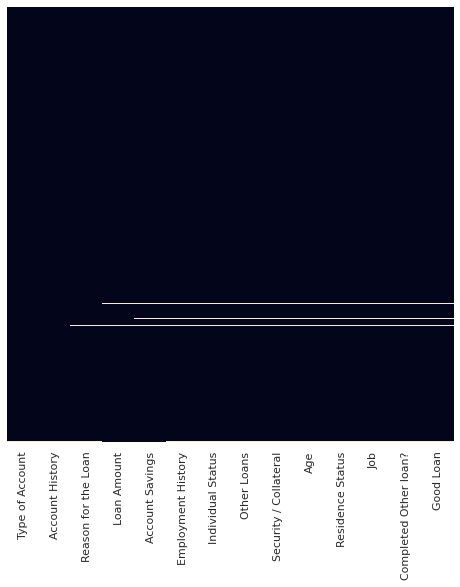

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, vmin=0.5, vmax=0.7, ax = ax)

By looking at the heatmap, we perceive that we effectively have some missing data, that we can visualize

To visualize the exact missing lines, we need to do a filter on one of the columns with the missing values.

For example, we will choose **Individual Status** feature.

In [16]:
# Viz the Missing Rows based on the Individual Status
df[df['Individual Status'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Status,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Printing the shape of the DataFrame before removing any missing value
print("The Num of Rows of the Original DataFrame",df.shape[0])

# Removing the Missing values
df = df.dropna(subset = ['Individual Status'])

The Num of Rows of the Original DataFrame 1006


In [18]:
df.isnull().sum()

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Status        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

So we have cleaned our data, and we don't have missing values anymore.

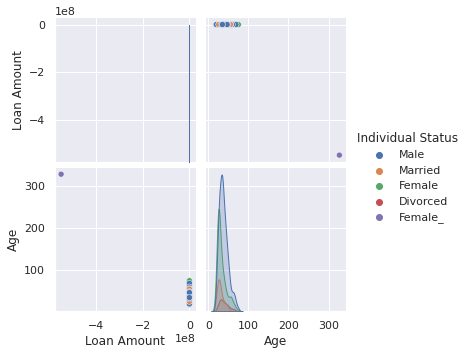

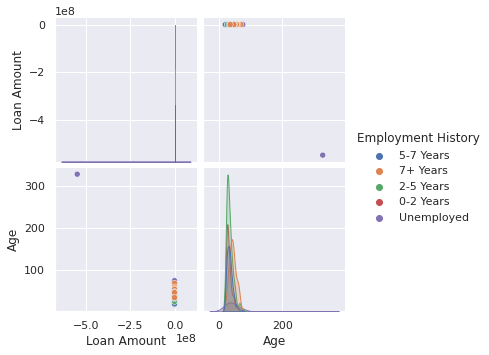

In [19]:
sns.pairplot(df, hue = 'Individual Status')
sns.pairplot(df, hue = 'Employment History')

**Comment** : By looking at either of the pairplots above, we can find that we have outliers like we've mentionned before of an age beyond 300 years, and a negative loan amount.

#### **Step 4 : Data Cleansing**

Deleting the Outliers

In [20]:
# Wa can eliminate the outliers, by applying some filters
df = df[df['Age'] < 100] 

# Eliminate the negative Loan Amounts
df = df[df["Loan Amount"] > 0]

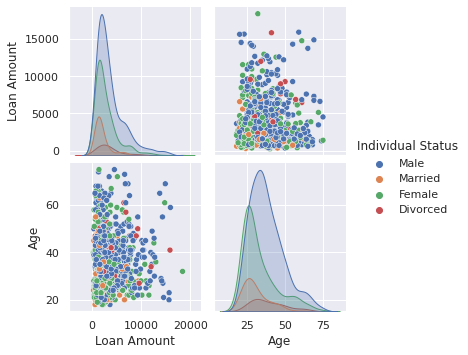

In [21]:
# Rerunning the pairplots
sns.pairplot(df, hue  = 'Individual Status')

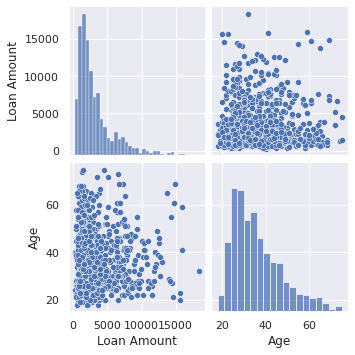

In [ ]:
sns.pairplot(df)

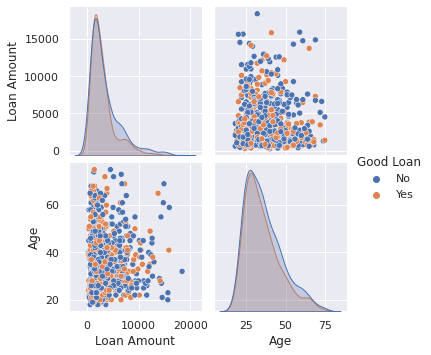

In [22]:
sns.pairplot(df, hue = 'Good Loan')

Investigating the distribution of y

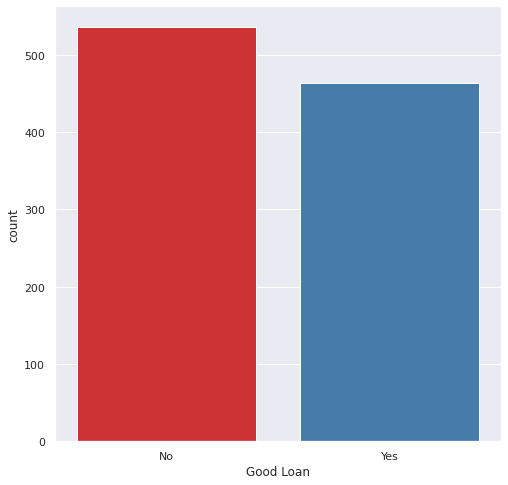

In [33]:
sns.countplot(x = 'Good Loan', data = df, palette = "Set1")

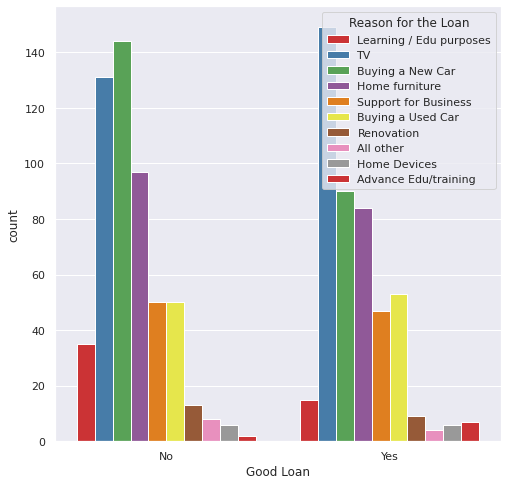

In [31]:
sns.countplot(x = 'Good Loan', data = df, palette = "Set1", hue = 'Reason for the Loan')

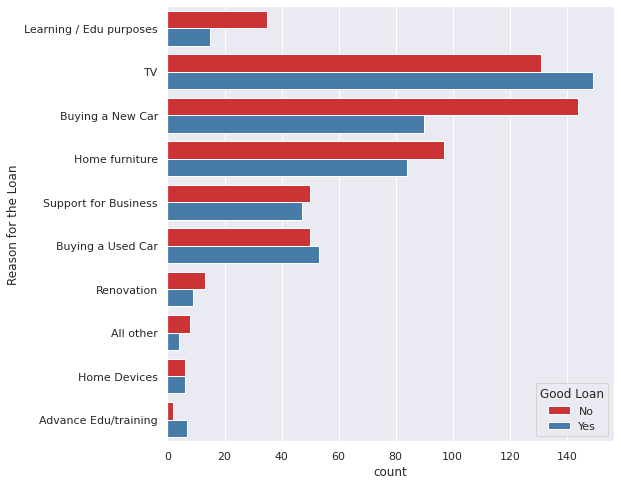

In [35]:
sns.countplot(y = 'Reason for the Loan', data = df, palette = "Set1", hue = "Good Loan")

if we look closely at the graph, we observe that for every *Reason to Buy a Loan* the answer NO is more than the answer YES, so based on this dataset the bank normaly take caution before approving a loan.
However for the *Advance Edu/training* we notice that the answer YES is way more than the answer NO, and the same goes for *Buying a Used Car*.
So from now on we need to enthral on attention on this.

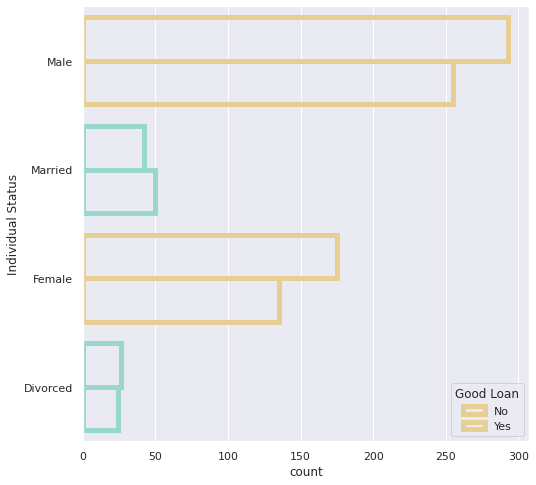

In [40]:
sns.countplot(y ='Individual Status', data = df,color="salmon", facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("BrBG", 2), hue = "Good Loan")

In [60]:
# sns.set(rc={'figure.figsize':(18,18)})
# sns.violinplot(y = "Age", x = 'Loan Amount', data = df, hue = "Good Loan")

In [48]:
df.dtypes

Type of Account           object
Account History           object
Reason for the Loan       object
Loan Amount              float64
Account Savings           object
Employment History        object
Individual Status         object
Other Loans               object
Security / Collateral     object
Age                      float64
Residence Status          object
Job                       object
Completed Other loan?     object
Good Loan                 object
dtype: object

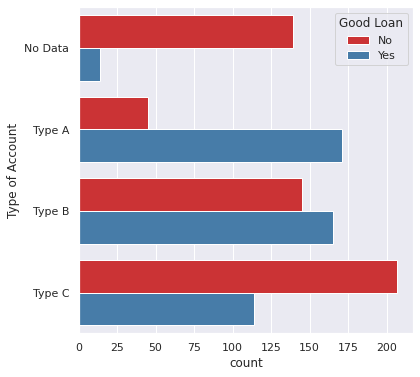

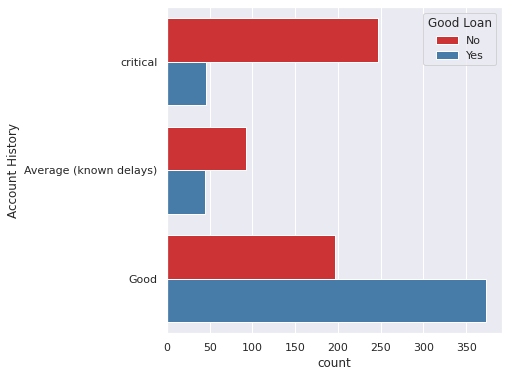

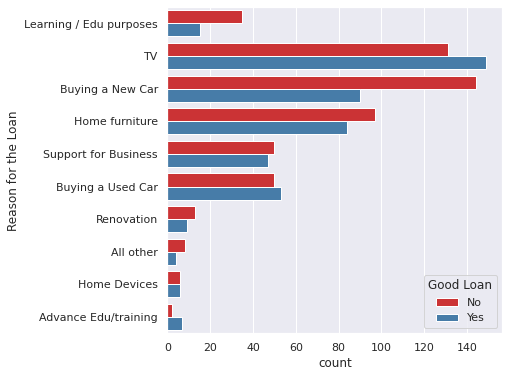

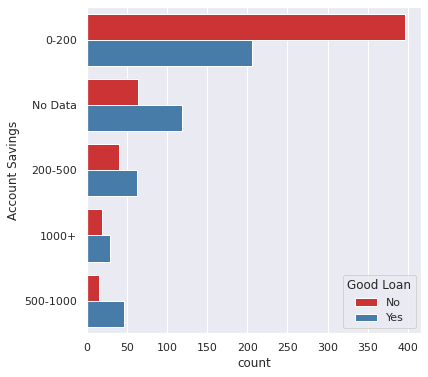

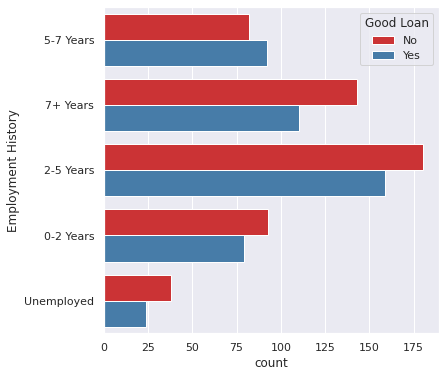

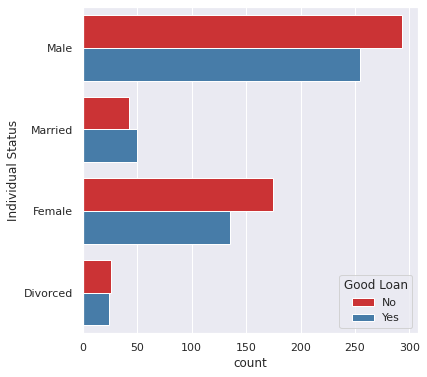

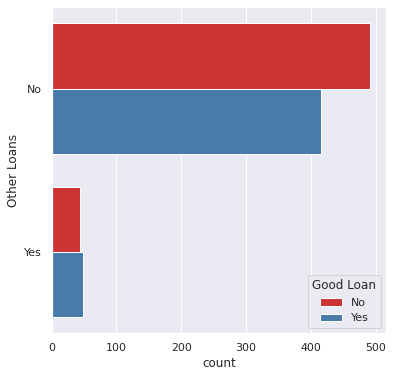

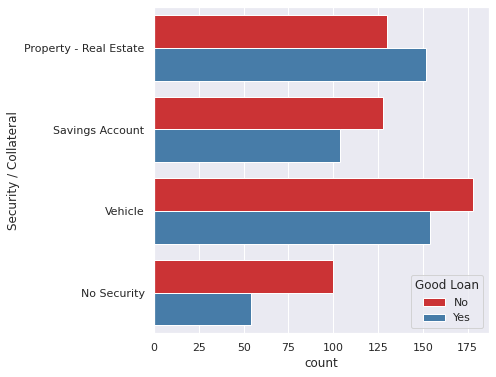

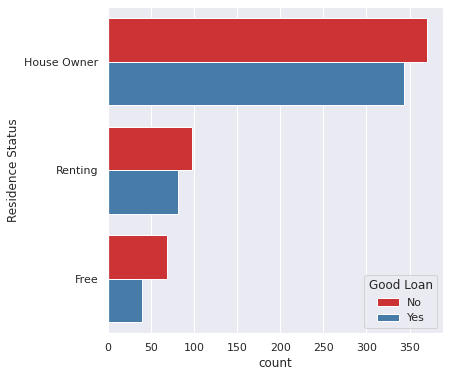

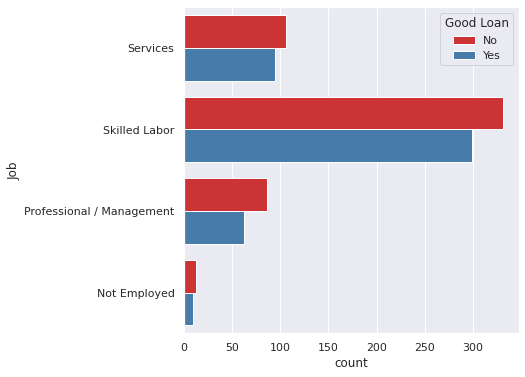

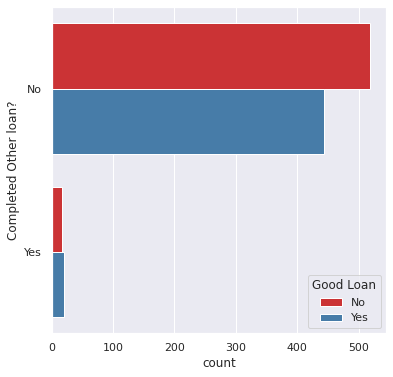

In [64]:
# Applying the countplot for every non numeric feature
features = [
       'Type of Account', 'Account History', 'Reason for the Loan',
       'Account Savings', 'Employment History',
       'Individual Status', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?'
]

for feature in features:
  sns.set(rc = {'figure.figsize': (6, 6)})
  sns.countplot(y = feature, data = df, hue = "Good Loan", palette = "Set1")
  plt.show()

Encoding the Data from categorical to numeric data

In [68]:
# Encoding the Data 
# df = pd.get_dummies(df, columns = features)

# changing the Good Loan Values from Y/N to 1s & 0s
df['Good Loan'][df['Good Loan'] == "Yes"] = 1
df['Good Loan'][df['Good Loan'] == "No"] = 0

# Displaying the Data
df.tail(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,Reason for the Loan_Advance Edu/training,Reason for the Loan_All other,Reason for the Loan_Buying a New Car,Reason for the Loan_Buying a Used Car,Reason for the Loan_Home Devices,Reason for the Loan_Home furniture,Reason for the Loan_Learning / Edu purposes,Reason for the Loan_Renovation,Reason for the Loan_Support for Business,Reason for the Loan_TV,Account Savings_0-200,Account Savings_1000+,Account Savings_200-500,Account Savings_500-1000,Account Savings_No Data,Employment History_0-2 Years,Employment History_2-5 Years,Employment History_5-7 Years,Employment History_7+ Years,Employment History_Unemployed,Individual Status_Divorced,Individual Status_Female,Individual Status_Male,Individual Status_Married,Other Loans_No,Other Loans_Yes,Security / Collateral_No Security,Security / Collateral_Property - Real Estate,Security / Collateral_Savings Account,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
994,10892.0,45.0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0
995,2174.0,26.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0
996,7686.0,42.0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0
997,7827.0,41.0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0
998,8950.0,32.0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
999,3602.0,47.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0
1003,1587.0,35.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0


In [69]:
df[df['Good Loan'] == 1]

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,Reason for the Loan_Advance Edu/training,Reason for the Loan_All other,Reason for the Loan_Buying a New Car,Reason for the Loan_Buying a Used Car,Reason for the Loan_Home Devices,Reason for the Loan_Home furniture,Reason for the Loan_Learning / Edu purposes,Reason for the Loan_Renovation,Reason for the Loan_Support for Business,Reason for the Loan_TV,Account Savings_0-200,Account Savings_1000+,Account Savings_200-500,Account Savings_500-1000,Account Savings_No Data,Employment History_0-2 Years,Employment History_2-5 Years,Employment History_5-7 Years,Employment History_7+ Years,Employment History_Unemployed,Individual Status_Divorced,Individual Status_Female,Individual Status_Male,Individual Status_Married,Other Loans_No,Other Loans_Yes,Security / Collateral_No Security,Security / Collateral_Property - Real Estate,Security / Collateral_Savings Account,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
15,3579.0,45.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0
17,1259.0,38.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0
19,699.0,50.0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0
20,1595.0,46.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0
21,1917.0,34.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,7686.0,42.0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0
997,7827.0,41.0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0
998,8950.0,32.0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
1001,12759.0,38.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0


#### **Step 4 : Features Selection** 

Step of Running feature selection:
- Split the Data into X & y.
- Run a Tree-based estimator (i.g Decision Tree, Random Forest).
- Run feature importance.